<a href="https://colab.research.google.com/github/Fathaa/W1764460/blob/main/w1764460.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



In [ ]:
stock_data = yf.download('AAPL', start='2010-01-01', end='2021-12-31')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [ ]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.995621,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016129,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.901642,59773000


In [ ]:
stock_data = stock_data.reset_index()
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [ ]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)
stock_data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


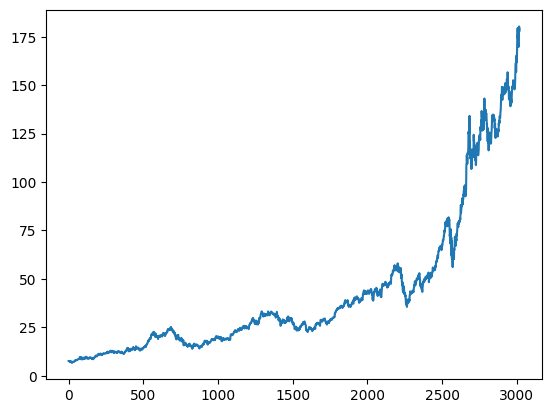

In [ ]:
plt.plot(stock_data.Close)

In [ ]:
stock_data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3015,175.850006,176.850006,175.270004,176.279999,68356600
3016,177.089996,180.419998,177.070007,180.330002,74919600
3017,180.160004,181.330002,178.529999,179.289993,79144300
3018,179.330002,180.630005,178.139999,179.380005,62348900


In [ ]:
ma100 = stock_data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    153.0106
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
Name: Close, Length: 3020, dtype: float64

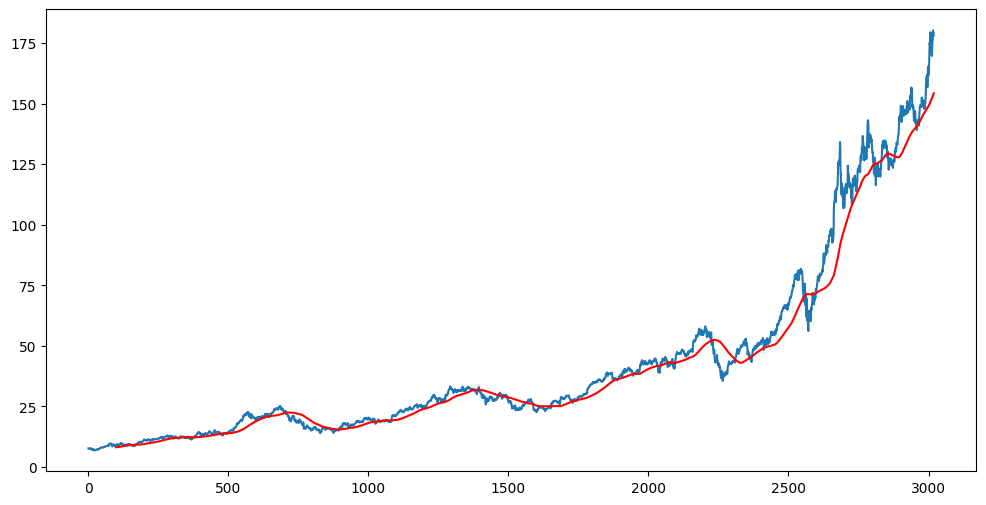

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = stock_data.rolling(200).mean()
ma200 

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3015,142.309051,143.792650,141.09790,142.55920,86177557.5
3016,142.592501,144.088900,141.38745,142.85570,86111630.0
3017,142.886251,144.375550,141.67800,143.13220,86045332.5
3018,143.154401,144.642600,141.94510,143.40125,85780937.5


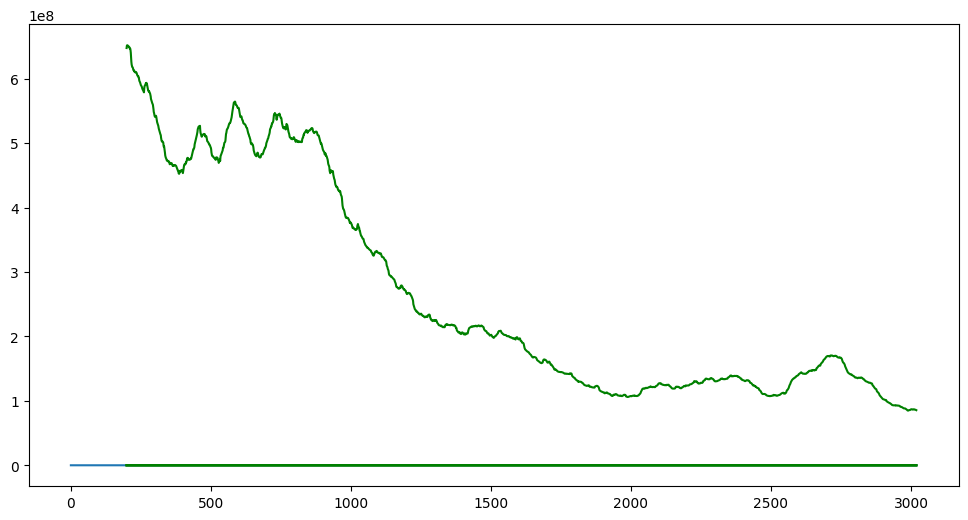

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma200, 'g')

In [ ]:
stock_data.shape

(3020, 5)

In [ ]:
#TRAINING AND TESTING OF THE DATA

data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70): int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [ ]:
data_training_array.shape

(2114, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train), np.array(y_train) 

In [ ]:
x_train.shape

(2014, 100, 1)

MACHINE LEARNING MODEL

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
63/63 [==============================] - 44s 501ms/step - loss: 0.0345
Epoch 2/50
63/63 [==============================] - 23s 360ms/step - loss: 0.0090
Epoch 3/50
63/63 [==============================] - 23s 364ms/step - loss: 0.0076
Epoch 4/50
63/63 [==============================] - 22s 356ms/step - loss: 0.0063
Epoch 5/50
63/63 [==============================] - 24s 374ms/step - loss: 0.0065
Epoch 6/50
63/63 [==============================] - 23s 368ms/step - loss: 0.0058
Epoch 7/50
63/63 [==============================] - 24s 380ms/step - loss: 0.0054
Epoch 8/50
63/63 [==============================] - 24s 387ms/step - loss: 0.0050
Epoch 9/50
63/63 [==============================] - 22s 354ms/step - loss: 0.0050
Epoch 10/50
63/63 [==============================] - 22s 348ms/step - loss: 0.0050
Epoch 11/50
63/63 [==============================] - 23s 365ms/step - loss: 0.0049
Epoch 12/50
63/63 [==============================] - 23s 363ms/step - loss: 0.0043
Epoch 13/50
6

In [ ]:
model.save('Stocktopia_model.h5')

In [ ]:
data_testing.head() 

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [ ]:
data_training.tail(100)

,Close
2014,43.057499
2015,43.257500
2016,43.750000
2017,43.587502
2018,43.582500
...,...
2109,46.907501
2110,46.790001
2111,47.090000
2112,47.037498


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_stock_data = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-75-79ef9f705b5a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_stock_data = past_100_days.append(data_testing, ignore_index=True)


In [ ]:
final_stock_data.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [ ]:
input_data = scaler.fit_transform(final_stock_data)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99281675],
       [0.99343845],
       [0.98528824]])

In [ ]:
input_data.shape

(1006, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [ ]:
#Making Predictions 

y_predicted = model.predict(x_test)

29/29 [==============================] - 4s 95ms/step


In [ ]:
y_predicted.shape

(906, 1)

In [ ]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [ ]:
y_predicted

array([[0.15112837],
       [0.15196684],
       [0.15271074],
       [0.1533556 ],
       [0.15391164],
       [0.15440173],
       [0.15485334],
       [0.15529254],
       [0.15573621],
       [0.15618579],
       [0.1566332 ],
       [0.15707202],
       [0.15749109],
       [0.15787837],
       [0.15821762],
       [0.15849394],
       [0.15868838],
       [0.15878877],
       [0.15878963],
       [0.1586902 ],
       [0.15848848],
       [0.15819263],
       [0.15781772],
       [0.15738146],
       [0.15690538],
       [0.15641926],
       [0.15593807],
       [0.15547313],
       [0.1550444 ],
       [0.15468043],
       [0.15440351],
       [0.15421537],
       [0.15411955],
       [0.15411977],
       [0.15420462],
       [0.15436941],
       [0.15460159],
       [0.15488996],
       [0.15522301],
       [0.15558815],
       [0.15597865],
       [0.1563963 ],
       [0.15684101],
       [0.15729634],
       [0.15773708],
       [0.15814207],
       [0.15853956],
       [0.158

In [ ]:
scaler.scale_

array([0.00690691])

In [ ]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

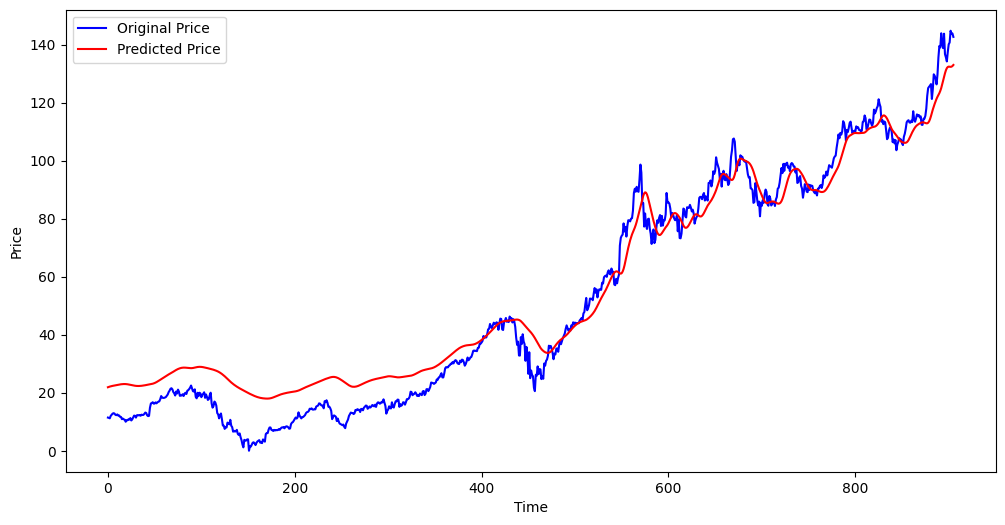

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show